# Medical Data Visualizer

## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.    
File name: medical_examination.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('np:', np.__version__)

pd: 1.5.3
sns: 0.12.2
np: 1.24.2


In [10]:
# Import data
df = pd.read_csv('medical_examination.csv')
print(df.shape)
display(df.head())
df.sample(10)

(70000, 13)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
25735,36726,20604,2,167,70.0,120,70,3,3,0,0,1,0
36019,51427,20579,2,183,128.0,140,90,2,1,1,0,1,1
20947,29911,15954,1,174,89.0,120,80,1,1,0,0,0,0
14360,20513,20461,2,167,81.0,130,90,2,1,0,1,1,0
9484,13514,21329,1,167,92.0,160,90,1,1,0,0,1,0
53419,76222,19697,2,166,76.0,150,100,3,1,0,0,1,1
46623,66567,18251,1,157,49.0,110,70,1,1,0,0,1,0
1047,1455,17552,1,171,80.0,100,80,2,1,0,0,1,0
52376,74705,21654,1,158,67.0,140,90,3,3,0,0,1,1
3344,4719,16173,1,162,130.0,110,70,3,1,0,1,1,1


### References:
- age: objetive feature - int (days)
- sex: of - categorical code ?
- height: of - int (cm)
- weight: of - float (kg)
- ap_hi: examination feature - int - Systolic blood pressure
- ap_lo: ef - int - Diastolic blood pressure
- cholesterol: ef - 1: normal, 2: above normal, 3: well above normal
- gluc: ef - 1: , 2:, 3: idem cholesterol - Glucose
- smoke: subjective feature - binary
- alco: sf - binary - Alcohol intake - binary
- active: df - binary - Physical activity
- cardio: target variable - binary - Presence or absence of cardiovascular disease

chol: 52385 17615 70000
gluc: 59479 10521 70000
alco: 66236 3764 70000


<BarContainer object of 3 artists>

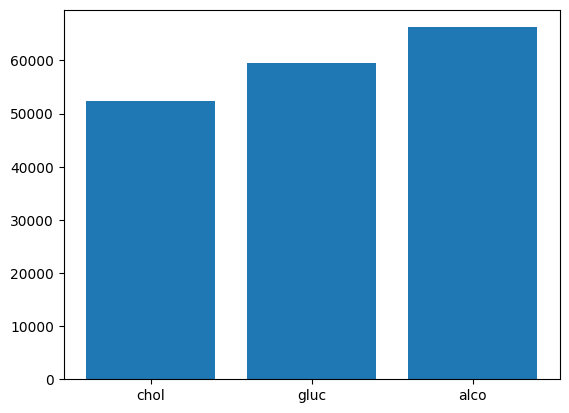

In [25]:
# 3 ways to count rows: .shape[0], len(df), len(df.index)

chol0_cnt = df.loc[df.cholesterol == 1].shape[0]
chol1_cnt = df.loc[df.cholesterol != 1].shape[0]
print('chol:', chol0_cnt, chol1_cnt, chol0_cnt + chol1_cnt)

gluc0_cnt = df.loc[df.gluc == 1].shape[0]
gluc1_cnt = df.loc[df.gluc != 1].shape[0]
print('gluc:', gluc0_cnt, gluc1_cnt, gluc0_cnt + gluc1_cnt)

alco0_cnt = df.loc[df.alco == 0].shape[0]
alco1_cnt = df.loc[df.alco == 1].shape[0]
print('alco:', alco0_cnt, alco1_cnt, alco0_cnt + alco1_cnt)

x = ['chol', 'gluc', 'alco']
y = [chol0_cnt, gluc0_cnt, alco0_cnt]

plt.bar(x, y)

In [31]:
card0_df = df.loc[df.cardio == 0]
card1_df = df.loc[df.cardio == 1]
print(card0_df.shape[0], card1_df.shape[0], card0_df.shape[0] + card1_df.shape[0])

card0_df.cholesterol.value_counts()

35021 34979 70000


1    29330
2     3799
3     1892
Name: cholesterol, dtype: int64

In [32]:
# mk values for cardio == 0

d0_chol0_cnt = card0_df.loc[df.cholesterol == 1].shape[0]
d0_chol1_cnt = card0_df.loc[df.cholesterol != 1].shape[0]
print('chol:', d0_chol0_cnt, d0_chol1_cnt, d0_chol0_cnt + d0_chol1_cnt)

d0_gluc0_cnt = card0_df.loc[df.gluc == 1].shape[0]
d0_gluc1_cnt = card0_df.loc[df.gluc != 1].shape[0]
print('gluc:', d0_gluc0_cnt, d0_gluc1_cnt, d0_gluc0_cnt + d0_gluc1_cnt)

d0_alco0_cnt = card0_df.loc[df.alco == 0].shape[0]
d0_alco1_cnt = card0_df.loc[df.alco == 1].shape[0]
print('alco:', d0_alco0_cnt, d0_alco1_cnt, d0_alco0_cnt + d0_alco1_cnt)

chol: 29330 5691 35021
gluc: 30894 4127 35021
alco: 33080 1941 35021


In [33]:
# mk values for cardio == 1

d1_chol0_cnt = card1_df.loc[df.cholesterol == 1].shape[0]
d1_chol1_cnt = card1_df.loc[df.cholesterol != 1].shape[0]
print('chol:', d1_chol0_cnt, d1_chol1_cnt, d1_chol0_cnt + d1_chol1_cnt)

d1_gluc0_cnt = card1_df.loc[df.gluc == 1].shape[0]
d1_gluc1_cnt = card1_df.loc[df.gluc != 1].shape[0]
print('gluc:', d1_gluc0_cnt, d1_gluc1_cnt, d1_gluc0_cnt + d1_gluc1_cnt)

d1_alco0_cnt = card1_df.loc[df.alco == 0].shape[0]
d1_alco1_cnt = card1_df.loc[df.alco == 1].shape[0]
print('alco:', d1_alco0_cnt, d1_alco1_cnt, d1_alco0_cnt + d1_alco1_cnt)

chol: 23055 11924 34979
gluc: 28585 6394 34979
alco: 33156 1823 34979


TypeError: Axes.bar() missing 1 required positional argument: 'height'

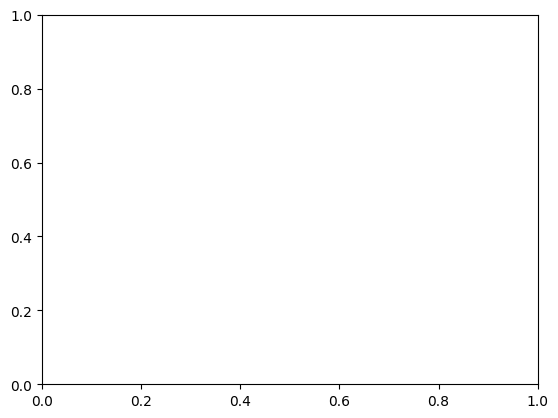

In [7]:

fig, ax = plt.subplots()
ax.bar(df.cholesterol)